In [6]:
from qiskit.circuit.library import IntegerComparator
 
size = 3 # number of state qubits
value = 5 # the fixed value to compare with
 
comp = IntegerComparator(size, value, geq=True, name='Comparator')
from qiskit.circuit import QuantumCircuit
 
circ = QuantumCircuit(2 * size, size + 1)
circ.h(range(size))
circ.append(comp, range(2 * size))
circ.measure(range(size + 1), range(size + 1))
circ.draw('mpl',reverse_bits=True)
circ.draw(output='mpl').savefig(
    "比较器.png", format="png", dpi=200, bbox_inches='tight')

In [6]:
from qiskit import transpile
from qiskit_aer import AerSimulator
 
simulator = AerSimulator()
 
circ = transpile(circ, backend=simulator)
job = simulator.run(circ)
for bitstring in sorted(job.result().get_counts()):
    print(bitstring)

0000
0001
0010
0011
0100
1101
1110
1111


In [3]:
from qiskit.circuit.library import IntegerComparator
import matplotlib.pyplot as plt 
size = 3 # number of state qubits
value = 5 # the fixed value to compare with
 
comp = IntegerComparator(size, value, geq=True, name='Comparator')
from qiskit.circuit import QuantumCircuit
 
circ = QuantumCircuit(2 * size, size + 1)
circ.h(range(size))
circ.append(comp, range(2 * size))
circ.measure(range(size + 1), range(size + 1))
circ.draw('mpl',reverse_bits=True)
circ.draw(output='mpl').savefig('Fig比较器.1.png')

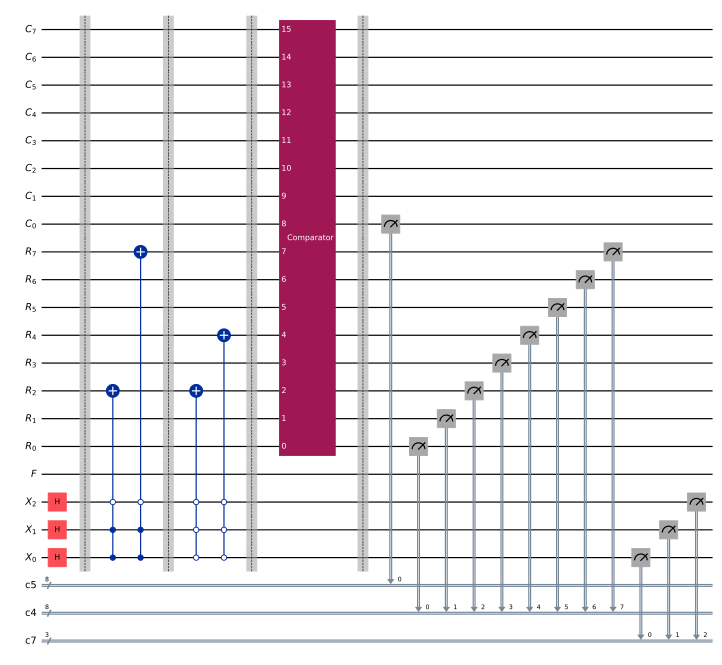

In [7]:
#比较器测试
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
#####寄存


q_F = QuantumRegister(1, name='F')
q_R = QuantumRegister(8, name='R')
q_C = QuantumRegister(8, name='C')
q_X = QuantumRegister(3, name='X')
c_R = ClassicalRegister(8)
c_C = ClassicalRegister(8)
c_F = ClassicalRegister(1)
c_X = ClassicalRegister(3)
#circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F)# ,q_B,c_B
circuit = QuantumCircuit(q_X,q_F,q_R,q_C,c_X,c_R,c_C)


circuit.h(q_X[0])
circuit.h(q_X[1])
circuit.h(q_X[2])

circuit.barrier()
gate = MCXGate(3,ctrl_state='011')#[0,7]
circuit.append(gate, [0, 1 ,2,6])#门的名称，控制位，控制目标
circuit.append(gate, [0, 1 ,2,11])#门的名称，控制位，控制目标
circuit.barrier()


gate = MCXGate(3,ctrl_state='000')#[0,7]
circuit.append(gate, [0, 1 ,2,6])#门的名称，控制位，控制目标
circuit.append(gate, [0, 1 ,2,8])#的名称，控制位，控制目标
circuit.barrier()

comp = IntegerComparator(8, 1, geq=True, name='Comparator')
circuit.append(comp, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
circuit.barrier()
circuit.measure(q_C[0], c_C[0])
circuit.measure(q_R, c_R)
circuit.measure(q_X, c_X)
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)



In [9]:
from qiskit import transpile
from qiskit_aer import AerSimulator
 
simulator = AerSimulator()
 
circ = transpile(circuit, backend=simulator)
job = simulator.run(circ,shots=2000)
for bitstring in sorted(job.result().get_counts()):
    print(bitstring)  #Y的坐标最后一位是标志位，前面顺着都是高到低位1100----0 110 =

00000000 00000000 001
00000000 00000000 010
00000000 00000000 100
00000000 00000000 101
00000000 00000000 110
00000000 00000000 111
00000001 00010100 000
00000001 10000100 011


In [9]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1) = qubits
(c0, c1) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((c0, 1)) as else_:
    circuit.h(q1)
with else_:
    circuit.x(q1)
circuit.measure(q1, c1)
 
circuit.draw("mpl").savefig(
    "逻辑电路.png", format="png", dpi=200, bbox_inches='tight')
 
# example output counts: {'01': 260, '11': 272, '10': 492}